In [1]:

from nltk.corpus import stopwords 
import binascii
import numpy as np
import matplotlib.pyplot as plt
import time 


# Part A

In [56]:


f = open('articles-1000.txt','r')
articles = f.readlines()
articleIDdict = {}
IDs= []

articlesAsShingleSets = {}
# articles = articles[0:3]
# print(lines[1])

for article in articles:
    
    shinglesInArticle = []
    words = article.strip().split(" ")
    stopWords = set(stopwords.words('english'))
    filteredWords = [w for w in words if not w in stopWords] 
    ID = filteredWords[0]
    IDs.append(ID)
    del filteredWords[0]
    articleIDdict[ID] = article
    
    for word in range(0, len(words)-2):
        shingle = str(words[word] + " " + words[word + 1])
        shingleID = binascii.crc32(shingle.encode('utf8')) & 0xffffffff
        shinglesInArticle.append(shingleID)
        
    
    articlesAsShingleSets[ID] = shinglesInArticle

allShingles = [articlesAsShingleSets[ID] for ID in IDs]
AvgShingles = 0
for i in allShingles:
    AvgShingles = AvgShingles + len(i)
AvgShingles = AvgShingles/len(allShingles)
flatset = set([ item for elem in allShingles for item in elem])

print(len(flatset))
print(AvgShingles)

145304
254.8


# Part B

In [99]:
def FindminHashSignatures(n):
    
    f = open('articles-1000.txt','r')
    articles = f.readlines()
    articleIDdict = {}
    IDs= []

    articlesAsShingleSets = {}
    # articles = articles[0:3]
    # print(lines[1])

    for article in articles:

        shinglesInArticle = []
        words = article.strip().split(" ")
        stopWords = set(stopwords.words('english'))
        filteredWords = [w for w in words if not w in stopWords] 
        ID = filteredWords[0]
        IDs.append(ID)
        del filteredWords[0]
        articleIDdict[ID] = article

        for word in range(0, len(words)-2):
            shingle = str(words[word] + " " + words[word + 1])
            shingleID = binascii.crc32(shingle.encode('utf8')) & 0xffffffff
            shinglesInArticle.append(shingleID)


        articlesAsShingleSets[ID] = shinglesInArticle

    
    maxShingleID = pow(2,32)
    prime = 4294967311
    numHashFunctions = n
    c = []
    c = np.random.uniform(0,prime-1,2*numHashFunctions)
    c1 = c[0:numHashFunctions]
    c2 = c[numHashFunctions:2*numHashFunctions]

    minhashSignatures = []

    for ID in IDs:

        shingleIDs = articlesAsShingleSets[ID]
        minhashSignature = []

        for i in range(0,numHashFunctions):
            minhashValue = float('inf')
            for shingleID in shingleIDs:
                hashValue = (c1[i]*shingleID+c2[i])%prime
                if hashValue<minhashValue:
                    minhashValue = hashValue
            minhashSignature.append(minhashValue)

        minhashSignatures.append(minhashSignature)
    
    return minhashSignatures
            

In [27]:
numHashFunctions = 10
minhashSignatures = FindminHashSignatures(numHashFunctions)
minhashSignatureArticle1 = minhashSignatures[0]
estimatedJaccard = []

for i in range(1,len(IDs)):
    
    
    minhashSignatureArticlei = minhashSignatures[i]
    count = 0
    
    for j in range(0,numHashFunctions):
        if (minhashSignatureArticle1[j] == minhashSignatureArticlei[j]):
            count += 1

    estimatedJaccard.append(count/numHashFunctions)
    
    
    
article1 = set(articlesAsShingleSets[IDs[0]])
articleMax = set(articlesAsShingleSets[IDs[estimatedJaccard.index(max(estimatedJaccard))+1]])
trueJaccard = len(article1.intersection(articleMax))/len(article1.union(articleMax))


10


In [5]:
print(trueJaccard, estimatedJaccard.index(max(estimatedJaccard)))

print(articles[802])
print(IDs[802])

0.9926470588235294 801
t7998 The Supreme Court in Johnnesberg on Friday postponed until March 14 a hearing on a petition by government minister Winnie Mandela to prevent police reading documents seized from her home, the SAPA news agency reported. David Wright and Carlos Delgado homered and Jorge Sosa won for the sixth time as the New York Mets snapped a four-game losing streak with a 3-0 victory over Detroit on Friday night. US Defense Secretary Robert Gates said on Sunday that Iran was not yet able to make a nuclear weapon and that its program was progressing slower than Tehran expected. A Palestinian suicide bomber blew himself up in a crowded hotel dining room here Wednesday evening just as more than 200 people gathered for their Passover holiday meal, killing at least 19 and wounding more than 100 others, many of them children. OPEC kingpin Saudi Arabia signalled Tuesday it could act alone to meet a predicted increase in demand for oil, as it pushed hesitant fellow members of the 

In [18]:
print(len(minhashSignatures[0]))

10


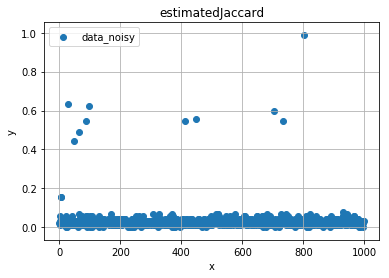

In [82]:
fig, ax = plt.subplots()
ax.scatter(range(0,len(estimatedJaccard)), estimatedJaccard[:], label='data_noisy')
ax.set_title('estimatedJaccard')
ax.set_xlabel('x') 
ax.set_ylabel('estimatedJaccard')
ax.grid()
leg = ax.legend()

plt.show()

# Part C

In [73]:
%%timeit
###implement LSH and generate the plots for the last two questions####
rows = [1,3,5,7,9]
# row = 2
# bands = [1,3,5,7,9]
# band = bands[0]

fpAvg = []

for row in rows:
    fp = []
    
    for count in range(0,10):
        S = {}
        numHashFunctions = band*row

        minhashSignatures = FindminHashSignatures(numHashFunctions)

        minhashSignatureArticle1 = minhashSignatures[0]
        minhashSignatureArticle1Chuncks = np.array_split(np.array(minhashSignatureArticle1),band)

        for ID in range(1,len(IDs)):
            
            minhashSignatureArticlei = minhashSignatures[ID]
            minhashSignatureArticleiChuncks = np.array_split(np.array(minhashSignatureArticlei),band)


            for i in range(0,len(minhashSignatureArticle1Chuncks)):
                if np.all(minhashSignatureArticle1Chuncks[i] == minhashSignatureArticleiChuncks[i]):

                    S[IDs[ID]] = minhashSignatureArticlei





        fpnum = []
        for i in S:
            article1 = set(minhashSignatureArticle1)
            articlei = set(S[i])
            trueJaccard = len(article1.intersection(articlei))/len(article1.union(articlei))

            if trueJaccard<0.8:

                fpnum.append(trueJaccard)


        fp.append(len(fpnum)/len(S))

    fpAvg.append(sum(fp)/len(fp))
       


In [63]:
print(fp)

0.0


In [78]:
IDs[733+1]


't7058'

In [41]:
print(fpAvg)

[0.9730335088727436, 0.8591666666666669, 0.605, 0.2333333333333333, 0.1]


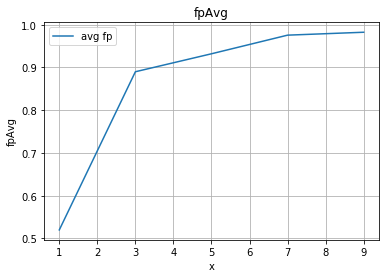

In [94]:
###################fpAvg as function of b
fpAvg = [0.52, 0.8900000000000002, 0.932015912015912, 0.9755829536317341, 0.9823920265780732]
bands = [1,3,5,7,9]
fig, ax = plt.subplots()

ax.plot(bands,fpAvg[:], label='avg fp')
# ax.plot(range(0,n),denoised[:], label='data_corrected')
ax.set_title('fpAvg')
ax.set_xlabel('x') 
ax.set_ylabel('fpAvg')
ax.grid()
leg = ax.legend()
plt.savefig('fp as a function of b ',dpi=300, bbox_inches='tight')
plt.show()

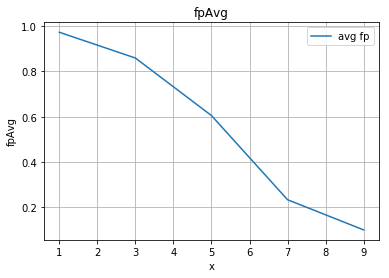

In [95]:
###################fpAvg as function of r
fpAvg = [0.9730335088727436, 0.8591666666666669, 0.605, 0.2333333333333333, 0.1]
rows = [1,3,5,7,9]
fig, ax = plt.subplots()

ax.plot(rows,fpAvg[:], label='avg fp')
# ax.plot(range(0,n),denoised[:], label='data_corrected')
ax.set_title('fpAvg')
ax.set_xlabel('x') 
ax.set_ylabel('fpAvg')
ax.grid()
leg = ax.legend()
plt.savefig('fp as a function of r ',dpi=300, bbox_inches='tight')
plt.show()

In [76]:
%%timeit
S = articlesAsShingleSets 
All = np.zeros([len(IDs),len(IDs)])
for i in range(0,len(All)):
    for j in range(i+1,len(All)):
            article1 = set(S[IDs[i]])
            articlei = set(S[IDs[j]])
            trueJaccard = len(article1.intersection(articlei))/len(article1.union(articlei))
            All[i,j] = trueJaccard
print(All)
        

[[0.         0.02656546 0.01008065 ... 0.00952381 0.012939   0.01498127]
 [0.         0.         0.00806452 ... 0.01147228 0.00922509 0.00744879]
 [0.         0.         0.         ... 0.00410678 0.0039604  0.01008065]
 ...
 [0.         0.         0.         ... 0.         0.01132075 0.00378788]
 [0.         0.         0.         ... 0.         0.         0.01669759]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.02656546 0.01008065 ... 0.00952381 0.012939   0.01498127]
 [0.         0.         0.00806452 ... 0.01147228 0.00922509 0.00744879]
 [0.         0.         0.         ... 0.00410678 0.0039604  0.01008065]
 ...
 [0.         0.         0.         ... 0.         0.01132075 0.00378788]
 [0.         0.         0.         ... 0.         0.         0.01669759]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.02656546 0.01008065 ... 0.00952381 0.012939   0.01498127]
 [0.         0.         0.00806452 ... 

In [118]:
%%timeit
# rows = [1,3,5,7,9]
# bands = [1,3,5,7,9]
# band = bands[0]
rows = 10
band = 16


# for row in rows:
    

    
#     for count in range(0,10):


numHashFunctions = band*row
S = {}
minhashSignatures = FindminHashSignatures(numHashFunctions)
for m in IDs:

    fp = []
    minhashSignatureArticle1 = minhashSignatures[IDs.index(m)]
    minhashSignatureArticle1Chuncks = np.array_split(np.array(minhashSignatureArticle1),band)

    for ID in IDs:

        minhashSignatureArticlei = minhashSignatures[IDs.index(ID)]
        minhashSignatureArticleiChuncks = np.array_split(np.array(minhashSignatureArticlei),band)


        for i in range(0,len(minhashSignatureArticle1Chuncks)):
            if np.all(minhashSignatureArticle1Chuncks[i] == minhashSignatureArticleiChuncks[i]):

                try:
                    S[m].append(ID)
                except:
                    S[m] = [ID]
                IDs.remove(ID)
                
                
                break;


#         print(S)


    fpnum = []
    for i in S:
        article1 = set(minhashSignatureArticle1)
        articlei = set(S[i])
        trueJaccard = len(article1.intersection(articlei))/len(article1.union(articlei))
#             print(trueJaccard)
        if trueJaccard<0.8:

            fpnum.append(trueJaccard)

#         print(fpnum)
    fp.append(len(fpnum)/len(S))


4.08 s ± 308 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [119]:
S

{'t556': ['t556', 't2988', 't8465'],
 't1235': ['t1235', 't4940', 't5806'],
 't1709': ['t1709'],
 't2882': ['t2882', 't4000', 't5373'],
 't3171': ['t3171', 't6186', 't9651'],
 't3366': ['t3366'],
 't3585': ['t571', 't3753'],
 't4554': ['t4554'],
 't4740': ['t4740', 't9945'],
 't5029': ['t5029'],
 't5297': ['t5297'],
 't5436': ['t3288', 't5954', 't9730'],
 't7729': ['t7729'],
 't8573': ['t8573'],
 't9268': ['t9268'],
 't9539': ['t9539'],
 't9737': ['t9737'],
 't9897': ['t9897']}